# Buying a rental property in Toronto, Ontario



## 1. Introduction

### 1.1.  Business Problem

There has been a significant increase in the individuals looking at owning rental properties as a source of income over the past decade. The real estate market in Toronto, Ontario has been very popular for the past decade, especially with Toronto becoming a business hub and tourist destination. Prices in Toronto are quite high, which is why it is extremely important that consumers make an informed decision when purchasing an income generating rental property.

Location is the key when purchasing a property, and two key characteristics that contributes to the success of an income generating property are the amenities nearby and the crime rate. 

The purpose of this study will be to look at the most attractive neighborhoods to purchase property in Toronto based on the access to amenities and crime rates.



### 1.2. Target Audience

The target audience of this report would be anyone who wants to buy an income generating property in the city Toronto, Ontario.



## 2. Data

The data used in this project has been linked below. Fortunately, Foursquare has lots of venues available in the city of Toronto compared to other Canadian cities and there are numerous public datasets that describe various aspects of Toronto.

### 1. **[Toronto Crime Data](https://open.toronto.ca/dataset/neighbourhood-crime-rates/)**.
    - This dataset includes the 2014-2019 Crime Data by Neighbourhood. Counts are available for Assault, Auto Theft, Break and Enter, Robbery, Theft Over and Homicide. Data also includes five-year averages and crime rates per 100,000 people by neighbourhood based on 2016 Census Population.
    
    
    
### 2. **[Toronto Postal Code Data](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)**.
    - This dataset includes data about Postal Codes, Boroughs, and Neighbourhoods in Toronto.
       
    
    
### 3. **Foursquare API.**
    - Foursquare is an independent data platform which allows you to retrieve information about the most popular spots in any city. Calling the Foursquare API will allow us to turn location data into a data frame for analysis in python.
     

    

## 3. Methodology

Import all required libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#Use beautiful soup method
!pip install bs4
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

print('Libraries imported.')



Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py

Ensure FourSquare credentials are inputted to allow them to be used later in the project.

In [2]:
#Foursquare credentials

CLIENT_ID = 'CPABSE2VIDC2M0ATA2EWJFC1OMY4DP0SFTUIFIHFUTDEUEIH' # your Foursquare ID
CLIENT_SECRET = 'U503LR42EI0KE3GEJVSJO1WYQCH42ZF114RHNMNUHXJZBXES' # your Foursquare Secret
VERSION = '20210101' # Foursquare API version
LIMIT = 500 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CPABSE2VIDC2M0ATA2EWJFC1OMY4DP0SFTUIFIHFUTDEUEIH
CLIENT_SECRET:U503LR42EI0KE3GEJVSJO1WYQCH42ZF114RHNMNUHXJZBXES


### Crime Data

Load the .csv file and then maniupulate it to only get the most relevant data.

We will average the annual data and form an "Average Crimes Per Year" for total crime.

In [3]:
crime = pd.read_csv(r'Neighbourhood Crime Rates.csv')
print(crime.shape)
crime.head()

(140, 62)


,_id,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,geometry
0,1,16,South Parkdale,85,21849,202,226,231,229,220,251,226.5,0.14,1148.8,13,20,23,19,17,20,18.7,0.18,91.5,45,51,71,58,78,89,65.3,0.14,407.3,0,0,1,0,0,1,0.3,1.0,4.6,24,35,41,30,35,33,33.0,-0.06,151.0,6,4,9,10,9,22,10.0,1.44,100.7,2.286974e+06,10802.832160,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,2,17,South Riverdale,70,27876,215,207,236,243,304,261,244.3,-0.14,936.3,18,23,27,37,40,40,30.8,0.00,143.5,89,98,148,94,91,133,108.8,0.46,477.1,1,0,3,5,2,0,1.8,-1.0,0.0,64,42,49,64,40,35,49.0,-0.13,125.6,18,16,22,27,24,21,21.3,-0.13,75.3,1.096457e+07,43080.724701,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
2,3,18,St.Andrew-Windfields,40,17812,53,41,48,45,55,58,50.0,0.05,325.6,15,25,10,15,21,35,20.2,0.67,196.5,81,79,57,91,81,83,78.7,0.02,466.0,1,0,0,2,0,0,0.5,0.0,0.0,8,5,14,0,4,12,7.2,2.00,67.4,10,14,8,7,6,6,8.5,0.00,33.7,7.299580e+06,13025.997456,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4,19,Taylor-Massey,61,15683,127,92,97,107,123,122,111.3,-0.01,777.9,11,9,7,5,12,12,9.3,0.00,76.5,31,71,43,27,41,63,46.0,0.54,401.7,0,1,1,1,0,1,0.7,1.0,6.4,24,37,16,20,16,13,21.0,-0.19,82.9,4,3,5,2,4,3,3.5,-0.25,19.1,1.062970e+06,5940.700050,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
4,5,20,Humber Summit,21,12416,76,89,118,116,109,118,104.3,0.08,950.4,66,42,62,83,106,135,82.3,0.27,1087.3,54,44,41,40,56,57,48.7,0.02,459.1,0,1,0,2,1,3,1.2,2.0,24.2,22,23,23,27,31,28,25.7,-0.10,225.5,15,16,18,18,15,22,17.3,0.47,177.2,7.966905e+06,12608.573118,"{u'type': u'Polygon', u'coordinates': (((-79.5..."


In [4]:
#take just the columns we need
crime1 = crime[['Neighbourhood','Population','Assault_AVG','AutoTheft_AVG','BreakandEnter_AVG','Homicide_AVG','Robbery_AVG','TheftOver_AVG']]

#drop all null values
crime2 = crime1.dropna()

#add a column to represent total crime in each neighbourhood
col_list= list(['Assault_AVG','AutoTheft_AVG','BreakandEnter_AVG','Homicide_AVG','Robbery_AVG','TheftOver_AVG'])
crime2['TotalCrime_AVG'] = crime2[col_list].sum(axis=1)

crime2.head(20)

,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,TotalCrime_AVG
0,South Parkdale,21849,226.5,18.7,65.3,0.3,33.0,10.0,353.8
1,South Riverdale,27876,244.3,30.8,108.8,1.8,49.0,21.3,456.0
2,St.Andrew-Windfields,17812,50.0,20.2,78.7,0.5,7.2,8.5,165.1
3,Taylor-Massey,15683,111.3,9.3,46.0,0.7,21.0,3.5,191.8
4,Humber Summit,12416,104.3,82.3,48.7,1.2,25.7,17.3,279.5
5,Humbermede,15545,133.3,49.3,36.7,0.3,28.2,6.0,253.8
6,Centennial Scarborough,13362,46.5,9.5,19.2,0.3,7.5,2.0,85.0
7,Church-Yonge Corridor,31340,642.8,37.8,188.5,2.0,135.7,33.8,1040.6
8,Clairlea-Birchmount,26984,260.5,44.5,94.2,1.2,41.0,11.7,453.1
9,Cliffcrest,15935,110.2,16.5,48.2,0.3,23.8,4.2,203.2


We now have population data and Average Crimes Per Year for each neighbourhood. Now we can reduce the dataframe to only have those columns.

In [5]:
#count the number of crimes in each neighborhood
crime3 = crime2[['Neighbourhood','Population','TotalCrime_AVG']]

#sort data by least to greatest
crime3 = crime3.sort_values(by=['TotalCrime_AVG'], ascending=True)

crime3

,Neighbourhood,Population,TotalCrime_AVG
77,Lambton Baby Point,7985,58.8
97,Woodbine-Lumsden,7865,63.4
109,Maple Leaf,10111,68.4
125,Yonge-St.Clair,12528,68.6
110,Markland Wood,10554,68.8
21,Guildwood,9917,68.8
35,Casa Loma,10968,79.9
34,Old East York,9233,80.1
39,Forest Hill South,10732,82.4
37,Kingsway South,9271,82.6


Let's have a look at our data graphically.

NameError: name 'plt' is not defined

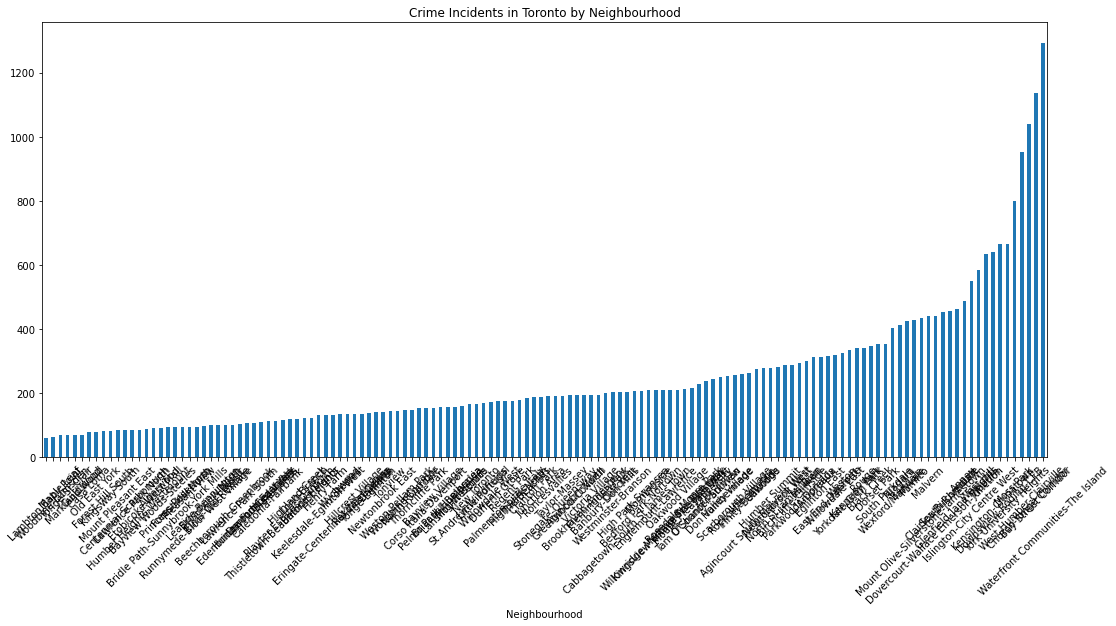

In [6]:
crime3.plot.bar(x = 'Neighbourhood', y = 'TotalCrime_AVG', title = "Crime Incidents in Toronto by Neighbourhood", legend = None, rot= 45, figsize = (18, 8))
plt.ylabel('Average Number of Crimes Reported', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighbourhood', fontsize=12)
plt.title('Crime Incidents in Toronto by Neighbourhood', fontsize = 14)
plt.show()

It is visually evident that an average of 200 Total Crimes per year is a below average number.

Let's use an Average Total Crime of "less than 200 incidents" from our crime dataset and use those neighbourhoods as the "safe" neighbourhoods we are interested in buying a rental property.

In [7]:
#get a dataframe with the 10 lowest incident neighborhoods
cols = ['TotalCrime_AVG']
crime3[cols] = crime3[crime3[cols] < 200][cols]
crime4 = crime3.dropna()

### Postal Code Data

Load the data using "BeautifulSoup".

In [8]:
#Url containing data regarding Alberta postal codes, boroughs, neighborhoods, latitiude and longitude.
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [9]:
#Obtain contents of the webpage in text format
data  = requests.get(url).text

#Start converting into a readable html format
soup = BeautifulSoup(data,"html5lib")

#Find all HTML tables in the web page
tables = soup.find_all('table')

In [10]:
#Turn the data into a dataframe
toronto_data = pd.DataFrame(columns=["Postal Code", "Borough", "Neighbourhood"])

for row in tables[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        postal_code = col[0].text.strip()
        borough = col[1].text.strip()
        neighbourhood = col[2].text.strip()
        toronto_data = toronto_data.append({"Postal Code":postal_code, "Borough":borough, "Neighbourhood":neighbourhood}, ignore_index=True)

toronto_data.tail()

,Postal Code,Borough,Neighbourhood
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."
179,M9Z,Not assigned,Not assigned


In [11]:
# Remove all rows that have "Not assigned"
toronto_data = toronto_data[toronto_data.Borough != 'Not assigned']
toronto_data = toronto_data[toronto_data.Neighbourhood != 'Not assigned']

toronto_data.tail()

,Postal Code,Borough,Neighbourhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


There are many neighbourhoods that are stuck in columns as "comma-separated". We will have to explode this row so each Neighbourhood is assigned to the correct Postal Code.

In [12]:
#create new dataset dropping the borough row
toronto_data1 = toronto_data.drop(['Borough'],axis=1)
toronto_data1 = toronto_data1.rename(columns={"Postal Code": "PostalCode"})
toronto_data1.tail()

,PostalCode,Neighbourhood
160,M8X,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Church and Wellesley
168,M7Y,"Business reply mail Processing Centre, South C..."
169,M8Y,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,"Mimico NW, The Queensway West, South of Bloor,..."


In [13]:
# Exploding into multiple cells to separate comma separated data in Neighbourhood column

toronto_data1 = toronto_data1.assign(Neighbourhood=toronto_data1.Neighbourhood.str.split(",")).explode('Neighbourhood')
toronto_data1.tail()

,PostalCode,Neighbourhood
178,M8Z,Mimico NW
178,M8Z,The Queensway West
178,M8Z,South of Bloor
178,M8Z,Kingsway Park South West
178,M8Z,Royal York South West


### Merging Datasets

We will now merge the datasets together to obtain our final dataset containing Postal Code Data and Crime Data. We are carrying the population column as an FYI.

In [14]:
#start by merging the datasets and making a new dataset
rental_data = toronto_data1.merge(crime4, on=['Neighbourhood'])

rental_data

,PostalCode,Neighbourhood,Population,TotalCrime_AVG
0,M4A,Victoria Village,17510,193.7
1,M5A,Regent Park,10803,176.6
2,M6C,Humewood-Cedarvale,14365,107.8
3,M1E,Guildwood,9917,68.8
4,M4E,The Beaches,21567,185.9
5,M2H,Hillcrest Village,16934,135.2
6,M3H,Bathurst Manor,15873,121.1
7,M4H,Thorncliffe Park,21108,152.0
8,M6J,Little Portugal,15559,169.9
9,M2K,Bayview Village,21396,154.7


Now let's get the coordinates for each of our neighborhoods.

In [15]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Toronto,Ontario")
rental_data['Coordinates'] = rental_data['Neighbourhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
rental_data

,PostalCode,Neighbourhood,Population,TotalCrime_AVG,Coordinates
0,M4A,Victoria Village,17510,193.7,"(43.732658, -79.3111892)"
1,M5A,Regent Park,10803,176.6,"(43.6607056, -79.3604569)"
2,M6C,Humewood-Cedarvale,14365,107.8,"(43.6883215, -79.4280805)"
3,M1E,Guildwood,9917,68.8,"(43.7552251, -79.1982293)"
4,M4E,The Beaches,21567,185.9,"(43.6710244, -79.296712)"
5,M2H,Hillcrest Village,16934,135.2,"(43.6816953, -79.4257118)"
6,M3H,Bathurst Manor,15873,121.1,"(43.76389295, -79.45636693710946)"
7,M4H,Thorncliffe Park,21108,152.0,"(43.704553, -79.3454074)"
8,M6J,Little Portugal,15559,169.9,"(43.64741325, -79.43111632546047)"
9,M2K,Bayview Village,21396,154.7,"(43.7691966, -79.3766617)"


There were some issues with the code, so we are going to re-type the info for Coordinates to obtain our desired dataframe.

In [16]:
rental_data.loc[rental_data.Neighbourhood == 'Victoria Village' , 'Coordinates'] = "(43.732658, -79.3111892)"
rental_data.loc[rental_data.Neighbourhood == 'Regent Park' , 'Coordinates'] = "(43.6607056, -79.3604569)"
rental_data.loc[rental_data.Neighbourhood == 'Humewood-Cedarvale' , 'Coordinates'] = "(43.6883215, -79.4280805)"
rental_data.loc[rental_data.Neighbourhood == 'Guildwood' , 'Coordinates'] = "(43.7552251, -79.1982293)"
rental_data.loc[rental_data.Neighbourhood == 'The Beaches' , 'Coordinates'] = "(43.6710244, -79.296712)"
rental_data.loc[rental_data.Neighbourhood == 'Hillcrest Village' , 'Coordinates'] = "(43.6816953, -79.4257118)"
rental_data.loc[rental_data.Neighbourhood == 'Bathurst Manor' , 'Coordinates'] = "(43.6655189, -79.4119373)"
rental_data.loc[rental_data.Neighbourhood == 'Thorncliffe Park' , 'Coordinates'] = "(43.704553, -79.3454074)"
rental_data.loc[rental_data.Neighbourhood == 'Little Portugal' , 'Coordinates'] = "(43.64741325, -79.43111632546047)"
rental_data.loc[rental_data.Neighbourhood == 'Bayview Village' , 'Coordinates'] = "(43.7691966, -79.3766617)"
rental_data.loc[rental_data.Neighbourhood == 'New Toronto' , 'Coordinates'] = "(43.6007625, -79.505264)"
rental_data.loc[rental_data.Neighbourhood == 'Alderwood' , 'Coordinates'] = "(43.6017173, -79.5452325)"

Now, we can add the Latitude and Longitude in separate columns and merge our datasets

In [17]:
rental_data['Coordinates'].to_string()
rental_data[['Latitude','Longitude']] = rental_data['Coordinates'].str.strip('(').str.strip(')').str.split(', ', expand=True)

rental_data

,PostalCode,Neighbourhood,Population,TotalCrime_AVG,Coordinates,Latitude,Longitude
0,M4A,Victoria Village,17510,193.7,"(43.732658, -79.3111892)",43.732658,-79.3111892
1,M5A,Regent Park,10803,176.6,"(43.6607056, -79.3604569)",43.6607056,-79.3604569
2,M6C,Humewood-Cedarvale,14365,107.8,"(43.6883215, -79.4280805)",43.6883215,-79.4280805
3,M1E,Guildwood,9917,68.8,"(43.7552251, -79.1982293)",43.7552251,-79.1982293
4,M4E,The Beaches,21567,185.9,"(43.6710244, -79.296712)",43.6710244,-79.296712
5,M2H,Hillcrest Village,16934,135.2,"(43.6816953, -79.4257118)",43.6816953,-79.4257118
6,M3H,Bathurst Manor,15873,121.1,"(43.6655189, -79.4119373)",43.6655189,-79.4119373
7,M4H,Thorncliffe Park,21108,152.0,"(43.704553, -79.3454074)",43.704553,-79.3454074
8,M6J,Little Portugal,15559,169.9,"(43.64741325, -79.43111632546047)",43.64741325,-79.43111632546047
9,M2K,Bayview Village,21396,154.7,"(43.7691966, -79.3766617)",43.7691966,-79.3766617


### Foursquare Data Analysis

Let's write a function to search the most popular venues within a .5 mile radius of our neighborhoods.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
rental_data_venues = getNearbyVenues(names=rental_data['Neighbourhood'],
                                   latitudes=rental_data['Latitude'],
                                   longitudes=rental_data['Longitude']
                                  )

Victoria Village
Regent Park
Humewood-Cedarvale
Guildwood
The Beaches
Hillcrest Village
Bathurst Manor
Thorncliffe Park
Little Portugal
Bayview Village
New Toronto
Alderwood


In [20]:
#Let's see the shape of our dataframe
print(rental_data_venues.shape)
rental_data_venues.head()

(545, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.732658,-79.3111892,Jatujak,43.736208,-79.307668,Thai Restaurant
1,Victoria Village,43.732658,-79.3111892,Armenian Kitchen,43.731071,-79.305390,Middle Eastern Restaurant
2,Victoria Village,43.732658,-79.3111892,Portugril,43.725819,-79.312785,Portuguese Restaurant
3,Victoria Village,43.732658,-79.3111892,Wigmore Park,43.731023,-79.310771,Park
4,Victoria Village,43.732658,-79.3111892,Artistic Nails,43.736120,-79.308080,Spa


In [21]:
#take a look at how many venues were pulled for each neighborhood
rental_data_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Alderwood,15,15,15,15,15,15
Bathurst Manor,100,100,100,100,100,100
Bayview Village,43,43,43,43,43,43
Guildwood,4,4,4,4,4,4
Hillcrest Village,56,56,56,56,56,56
Humewood-Cedarvale,27,27,27,27,27,27
Little Portugal,100,100,100,100,100,100
New Toronto,25,25,25,25,25,25
Regent Park,67,67,67,67,67,67


In [22]:
#the number of unique types of venues pulled
print('There are {} uniques categories.'.format(len(rental_data_venues['Venue Category'].unique())))

There are 157 uniques categories.


What are the most common venue categories in our neighborhoods with the lowest crime?

NameError: name 'plt' is not defined

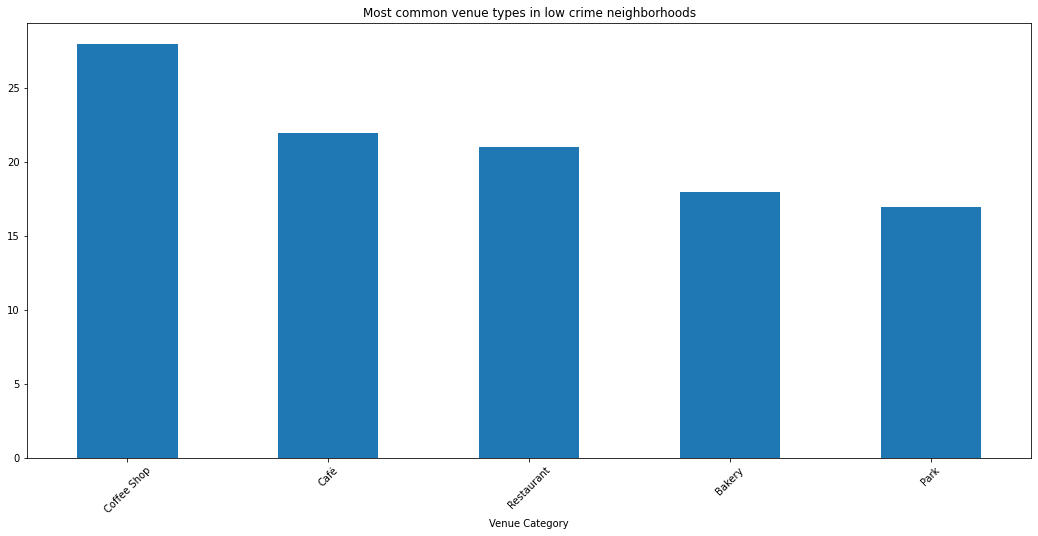

In [23]:
rental_top_venues = rental_data_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighbourhood', ascending = False).head(5)
rental_top_venues = rental_top_venues[['Venue Category','Neighbourhood']]
rental_top_venues.rename(columns={'Neighbourhood': 'Frequency'}, inplace = True)
rental_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in low crime neighborhoods", rot= 45, figsize = (18, 8))
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most common venue types in low crime neighborhoods', fontsize = 14)
plt.show()

It looks the most common venue types are ranked as:
1. Coffee shops
2. Cafes
3. Restaraunts
4. Bakeries
5. Parks

Let's do some one hot encoding to further analyze our results.

In [24]:
# one hot encoding
rental_onehot = pd.get_dummies(rental_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rental_onehot['Neighbourhood'] = rental_data_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [rental_onehot.columns[-1]] + list(rental_onehot.columns[:-1])
rental_onehot = rental_onehot[fixed_columns]

rental_onehot.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Café,Camera Store,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Hockey Arena,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Moving Target,Music Venue,Nail Salon,Neighborhood,Nightclub,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,School,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Stadium,Soup Place,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#examine shape of new dataframe
rental_onehot.shape

(545, 158)

In [26]:
#now group the data
rental_grouped = rental_onehot.groupby('Neighbourhood').mean().reset_index()
print(rental_grouped.shape)
rental_grouped

(12, 158)


,Neighbourhood,Afghan Restaurant,American Restaurant,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Café,Camera Store,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Hockey Arena,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Moving Target,Music Venue,Nail Salon,Neighborhood,Nightclub,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,School,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Stadium,Soup Place,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Alderwood,0.0000,0.000000,0.000000,0.00,0.00,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.066667,0.133333,0.00,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.066667,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.066667,0.00,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.00,0.000000,0.00,0.066667,0.000000,0.000000,0.00,0.000000,0.066667,0.00,0.000000,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.00,0.00,0.00000,0.00,0.0,0.000000,0.000000
1,Bathurst Manor,0.0000,0.010000,0.000000,0.00,0.01,0.000000,0.000000,0.000000,0.010000,0.040000,0.010000,0.020000,0.000000,0.000000,0.00,0.02,0.000000,0.01,0.010000,0.00,0.00,0.000000,0.00,0.00000,0.01,0.000000,0.040000,0.000000,0.010000,0.010000,0.00,0.000000,0.000000,0.00,0.040000,0.000000,0.01,0.000000,0.010000,0.030000,0.010000,0.000000,0.00,0.000000,0.000000,0.02,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0

Let's assume a strong rental property is a combination of access to:

1. Train Station (Only one neighbourhood [Guildwood] has a Train Station nearby, so we can leave it out of the analysis below and keep it as an FYI variable for later)
2. Grocery Store
3. Supermarket
4. Restaurants
5. Bars
6. Cafes
7. Coffee Shops

In [27]:
#Let's find all the columns that contain "Restaurant"

rest_groups = [col for col in rental_grouped.columns if 'Restaurant' in col]
print(rest_groups)

['Afghan Restaurant', 'American Restaurant', 'Asian Restaurant', 'Brazilian Restaurant', 'Caribbean Restaurant', 'Chinese Restaurant', 'Eastern European Restaurant', 'Ethiopian Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'French Restaurant', 'Greek Restaurant', 'Hawaiian Restaurant', 'Indian Restaurant', 'Italian Restaurant', 'Japanese Restaurant', 'Jewish Restaurant', 'Korean Restaurant', 'Latin American Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Persian Restaurant', 'Portuguese Restaurant', 'Ramen Restaurant', 'Restaurant', 'South American Restaurant', 'Sushi Restaurant', 'Taiwanese Restaurant', 'Thai Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant']


In [28]:
#Let's find all the columns that contain "Bar"

bar_groups = [col for col in rental_grouped.columns if 'Bar' in col]
print(bar_groups)

['Bar', 'Beach Bar', 'Beer Bar', 'Cocktail Bar', 'Hotel Bar', 'Juice Bar', 'Karaoke Bar', 'Salon / Barbershop', 'Sports Bar', 'Wine Bar']


Let's find the sum to see the amount of "best" venues present in each neightbourhood to determine the ideal rental property neighbourhood

In [29]:
tot_venue = rental_grouped[['Neighbourhood','Bar', 'Beach Bar', 'Beer Bar', 'Cocktail Bar', 'Karaoke Bar', 'Sports Bar', 'Wine Bar','Afghan Restaurant', 'American Restaurant', 'Asian Restaurant', 'Brazilian Restaurant', 'Caribbean Restaurant', 'Chinese Restaurant', 'Eastern European Restaurant', 'Ethiopian Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'French Restaurant', 'Greek Restaurant', 'Hawaiian Restaurant', 'Indian Restaurant', 'Italian Restaurant', 'Japanese Restaurant', 'Jewish Restaurant', 'Korean Restaurant', 'Latin American Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Persian Restaurant', 'Portuguese Restaurant', 'Ramen Restaurant', 'Restaurant', 'South American Restaurant', 'Sushi Restaurant', 'Taiwanese Restaurant', 'Thai Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant','Coffee Shop','Café','Supermarket','Grocery Store']]
tot_venue["Sum"] = tot_venue.sum(axis=1)
tot_venue.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighbourhood,Bar,Beach Bar,Beer Bar,Cocktail Bar,Karaoke Bar,Sports Bar,Wine Bar,Afghan Restaurant,American Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,South American Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Coffee Shop,Café,Supermarket,Grocery Store,Sum
0,Alderwood,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00,0.066667,0.000000,0.0,0.000000,0.066667
1,Bathurst Manor,0.02,0.0,0.02,0.0,0.01,0.0,0.0,0.0,0.010000,0.0,0.0,0.010000,0.010000,0.02,0.0,0.000000,0.000000,0.01,0.01,0.0,0.000000,0.030000,0.02,0.000000,0.13,0.010000,0.000000,0.020000,0.01,0.000000,0.000000,0.01,0.020000,0.000000,0.010000,0.0,0.010000,0.0,0.02,0.01,0.040000,0.040000,0.0,0.060000,0.560000
2,Bayview Village,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.046512,0.00,0.0,0.023256,0.000000,0.00,0.00,0.0,0.000000,0.023256,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.023256,0.000000,0.00,0.023256,0.000000,0.000000,0.0,0.023256,0.0,0.00,0.00,0.069767,0.069767,0.0,0.000000,0.302326
3,Guildwood,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.000000
4,Hillcrest Village,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.017857,0.0,0.0,0.017857,0.017857,0.00,0.0,0.000000,0.017857,0.00,0.00,0.0,0.053571,0.053571,0.00,0.017857,0.00,0.017857,0.017857,0.053571,0.00,0.000000,0.017857,0.00,0.053571,0.017857,0.035714,0.0,0.017857,0.0,0.00,0.00,0.053571,0.035714,0.0,0.017857,0.535714


We can now see the frequency of the top 5 types of venues for each neighborhood.

In [30]:
#print each neighborhood with the top 5 most common venues
num_top_venues = 5

for hood in rental_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = rental_grouped[rental_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alderwood----
               venue  freq
0  Convenience Store  0.13
1        Pizza Place  0.13
2         Donut Shop  0.07
3       Dance Studio  0.07
4               Park  0.07


----Bathurst Manor----
               venue  freq
0  Korean Restaurant  0.13
1      Grocery Store  0.06
2        Coffee Shop  0.04
3             Bakery  0.04
4               Café  0.04


----Bayview Village----
                    venue  freq
0                    Café  0.07
1  Furniture / Home Store  0.07
2             Coffee Shop  0.07
3              Shoe Store  0.05
4          Clothing Store  0.05


----Guildwood----
               venue  freq
0      Train Station  0.50
1      Moving Target  0.25
2     Baseball Field  0.25
3  Afghan Restaurant  0.00
4        Music Venue  0.00


----Hillcrest Village----
                venue  freq
0  Mexican Restaurant  0.05
1      Ice Cream Shop  0.05
2   Indian Restaurant  0.05
3          Restaurant  0.05
4         Coffee Shop  0.05


----Humewood-Cedarvale----
        

Now we can place our data into a dataframe of the most popular venues for each neighborhood.

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [78]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = rental_grouped['Neighbourhood']

for ind in np.arange(rental_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rental_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,Alderwood,Convenience Store,Pizza Place,Coffee Shop,Donut Shop,Park,Skating Rink,Gas Station,Pub,Pharmacy,Athletics & Sports,Dance Studio,Gym,Sandwich Place,Electronics Store,Ethiopian Restaurant,Elementary School,Event Space,Distribution Center,Eastern European Restaurant,Dog Run,Farmers Market,Discount Store,Diner,Farm,Yoga Studio,Fast Food Restaurant,Dessert Shop,Hawaiian Restaurant,Gym / Fitness Center,Grocery Store
1,Bathurst Manor,Korean Restaurant,Grocery Store,Bakery,Coffee Shop,Café,Pizza Place,Dessert Shop,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Beer Bar,Park,Bar,Sandwich Place,Mexican Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Video Store,Restaurant,Middle Eastern Restaurant,Caribbean Restaurant,Chinese Restaurant,French Restaurant,Paper / Office Supplies Store,Playground,Yoga Studio,Lingerie Store,Cosmetics Shop,Deli / Bodega,Diner
2,Bayview Village,Coffee Shop,Café,Furniture / Home Store,Burger Joint,Shoe Store,Chinese Restaurant,Clothing Store,Bank,Fast Food Restaurant,Pharmacy,Sporting Goods Shop,Spa,Pizza Place,Breakfast Spot,Sandwich Place,Restaurant,Camera Store,Shopping Mall,Italian Restaurant,Fish Market,Persian Restaurant,Gourmet Shop,Moving Target,Outdoor Supply Store,Gas Station,Park,Bakery,Toy / Game Store,Ice Cream Shop,Thai Restaurant
3,Guildwood,Train Station,Moving Target,Baseball Field,Event Space,Fish & Chips Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Yoga Studio,Food,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,Fish Market,Food & Drink Shop,Dessert Shop,Food Truck,Health Food Store,Health & Beauty Service,Hawaiian Restaurant,Gym / Fitness Center,Gym,Grocery Store
4,Hillcrest Village,Coffee Shop,Ice Cream Shop,Italian Restaurant,Indian Restaurant,Mexican Restaurant,Restaurant,Sushi Restaurant,Bakery,Bank,Pizza Place,Café,Chinese Restaurant,Caribbean Restaurant,Portuguese Restaurant,Convenience Store,Park,Dessert Shop,Discount Store,Yoga Studio,Liquor Store,Mediterranean Restaurant,Event Space,Latin American Restaurant,Farmers Market,Jewish Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,High School,Frozen Yogurt Shop
5,Humewood-Cedarvale,Café,Bakery,Convenience Store,Playground,Martial Arts School,Burger Joint,Field,Filipino Restaurant,Soccer Stadium,Fish & Chips Shop,Restaurant,Mexican Restaurant,Sushi Restaurant,Portuguese Restaurant,Italian Restaurant,Intersection,Ice Cream Shop,Trail,BBQ Joint,Hockey Arena,Deli / Bodega,Grocery Store,American Restaurant,Mediterranean Restaurant,Ethiopian Restaurant,Elementary School,Event Space,Farm,Electronics Store,Farmers Market
6,Little Portugal,Bar,Café,Bakery,Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Gift Shop,Italian Restaurant,Mexican Restaurant,Cocktail Bar,Japanese Restaurant,Korean Restaurant,Sandwich Place,French Restaurant,Arts & Crafts Store,Thrift / Vintage Store,Vietnamese Restaurant,Park,Nightclub,Neighborhood,Thai Restaurant,Music Venue,Middle Eastern Restaurant,Art Gallery,Men's Store,Diner,Lounge,Distribution Center,Theater,Chiropractor
7,New Toronto,Park,Mexican Restaurant,Pharmacy,Italian Restaurant,Coffee Shop,Fast Food Restaurant,Liquor Store,Restaurant,Supermark

### Clustering

Let's use K means clustering to cluster our neighborhoods for more insights!

In [79]:
# set number of clusters
kclusters = 6

rental_grouped_clustering = rental_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rental_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 5, 2, 5, 1, 1, 5, 5, 1], dtype=int32)

Now create a dataframe that includes clusters for each neighborhood

In [80]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rental_merged = rental_data

In [81]:
# merge rental_grouped with rental_data to add latitude/longitude for each neighborhood
rental_merged = rental_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

rental_merged

,PostalCode,Neighbourhood,Population,TotalCrime_AVG,Coordinates,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,M4A,Victoria Village,17510,193.7,"(43.732658, -79.3111892)",43.732658,-79.3111892,0,Pizza Place,Park,Middle Eastern Restaurant,French Restaurant,Thai Restaurant,Chinese Restaurant,Intersection,Spa,Portuguese Restaurant,Wings Joint,Distribution Center,Dog Run,Donut Shop,Fast Food Restaurant,Discount Store,Electronics Store,Diner,Dessert Shop,Elementary School,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Eastern European Restaurant,Yoga Studio,Field,Gas Station,Gym / Fitness Center,Gym,Grocery Store
1,M5A,Regent Park,10803,176.6,"(43.6607056, -79.3604569)",43.6607056,-79.3604569,5,Coffee Shop,Restaurant,Park,Pharmacy,Thai Restaurant,Pub,Breakfast Spot,Diner,Chinese Restaurant,Café,Grocery Store,Bank,Event Space,Pizza Place,Greek Restaurant,Pet Store,Performing Arts Venue,Animal Shelter,Deli / Bodega,Dog Run,Electronics Store,Farm,Auto Dealership,Farmers Market,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Food Truck,Gastropub,Gift Shop
2,M6C,Humewood-Cedarvale,14365,107.8,"(43.6883215, -79.4280805)",43.6883215,-79.4280805,1,Café,Bakery,Convenience Store,Playground,Martial Arts School,Burger Joint,Field,Filipino Restaurant,Soccer Stadium,Fish & Chips Shop,Restaurant,Mexican Restaurant,Sushi Restaurant,Portuguese Restaurant,Italian Restaurant,Intersection,Ice Cream Shop,Trail,BBQ Joint,Hockey Arena,Deli / Bodega,Grocery Store,American Restaurant,Mediterranean Restaurant,Ethiopian Restaurant,Elementary School,Event Space,Farm,Electronics Store,Farmers Market
3,M1E,Guildwood,9917,68.8,"(43.7552251, -79.1982293)",43.7552251,-79.1982293,2,Train Station,Moving Target,Baseball Field,Event Space,Fish & Chips Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Yoga Studio,Food,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,Fish Market,Food & Drink Shop,Dessert Shop,Food Truck,Health Food Store,Health & Beauty Service,Hawaiian Restaurant,Gym / Fitness Center,Gym,Grocery Store
4,M4E,The Beaches,21567,185.9,"(43.6710244, -79.296712)",43.6710244,-79.296712,1,Pub,Beach,Breakfast Spot,Japanese Restaurant,Bar,BBQ Joint,Pizza Place,Thai Restaurant,Park,Coffee Shop,Mexican Restaurant,Middle Eastern Restaurant,Nail Salon,Yoga Studio,Fried Chicken Joint,Pharmacy,Café,Burger Joint,Chocolate Shop,Martial Arts School,Mediterranean Restaurant,Restaurant,Liquor Store,Diner,Dog Run,Juice Bar,Indie Movie Theater,Indian Restaurant,Ice Cream Shop,Women's Store
5,M2H,Hillcrest Village,16934,135.2,"(43.6816953, -79.4257118)",43.6816953,-79.4257118,5,Coffee Shop,Ice Cream Shop,Italian Restaurant,Indian Restaurant,Mexican Restaurant,Restaurant,Sushi Restaurant,Bakery,Bank,Pizza Place,Café,Chinese Restaurant,Caribbean Restaurant,Portuguese Restaurant,Convenience Store,Park,Dessert Shop,Discount Store,Yoga Studio,Liquor Store,Mediterranean Restaurant,Event Space,Latin American Restaurant,Farmers Market,Jewish Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,High School,Frozen Yogurt Shop
6,M3H,Bathurst Manor,15873,121.1,"(43.6655189, -79.4119373)",43.6655189,-79.4119373,1,Korean Restaurant,Grocery Store,Bakery,Coffee Shop,Café,Pizza Place,Dessert Shop

In [82]:
#also including the number of venues in each neighbourhood which contribute most to a valuable rental property.
rental_merged["Best Venues"] = ""
rental_merged.loc[rental_merged.Neighbourhood == 'Victoria Village' , 'Best Venues'] = 0.066667
rental_merged.loc[rental_merged.Neighbourhood == 'Regent Park' , 'Best Venues'] = 0.56
rental_merged.loc[rental_merged.Neighbourhood == 'Humewood-Cedarvale' , 'Best Venues'] = 0.302326
rental_merged.loc[rental_merged.Neighbourhood == 'Guildwood' , 'Best Venues'] = 0
rental_merged.loc[rental_merged.Neighbourhood == 'The Beaches' , 'Best Venues'] = 0.535714
rental_merged.loc[rental_merged.Neighbourhood == 'Hillcrest Village' , 'Best Venues'] = 0.407407
rental_merged.loc[rental_merged.Neighbourhood == 'Bathurst Manor' , 'Best Venues'] = 0.58
rental_merged.loc[rental_merged.Neighbourhood == 'Thorncliffe Park' , 'Best Venues'] = 0.48
rental_merged.loc[rental_merged.Neighbourhood == 'Little Portugal' , 'Best Venues'] = 0.402985
rental_merged.loc[rental_merged.Neighbourhood == 'Bayview Village' , 'Best Venues'] = 0.318182
rental_merged.loc[rental_merged.Neighbourhood == 'New Toronto' , 'Best Venues'] = 0.468750
rental_merged.loc[rental_merged.Neighbourhood == 'Alderwood' , 'Best Venues'] = 0.5
rental_merged['Best Venues'] = rental_merged['Best Venues'].astype(float)

rental_merged

,PostalCode,Neighbourhood,Population,TotalCrime_AVG,Coordinates,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,Best Venues
0,M4A,Victoria Village,17510,193.7,"(43.732658, -79.3111892)",43.732658,-79.3111892,0,Pizza Place,Park,Middle Eastern Restaurant,French Restaurant,Thai Restaurant,Chinese Restaurant,Intersection,Spa,Portuguese Restaurant,Wings Joint,Distribution Center,Dog Run,Donut Shop,Fast Food Restaurant,Discount Store,Electronics Store,Diner,Dessert Shop,Elementary School,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Eastern European Restaurant,Yoga Studio,Field,Gas Station,Gym / Fitness Center,Gym,Grocery Store,0.066667
1,M5A,Regent Park,10803,176.6,"(43.6607056, -79.3604569)",43.6607056,-79.3604569,5,Coffee Shop,Restaurant,Park,Pharmacy,Thai Restaurant,Pub,Breakfast Spot,Diner,Chinese Restaurant,Café,Grocery Store,Bank,Event Space,Pizza Place,Greek Restaurant,Pet Store,Performing Arts Venue,Animal Shelter,Deli / Bodega,Dog Run,Electronics Store,Farm,Auto Dealership,Farmers Market,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Food Truck,Gastropub,Gift Shop,0.560000
2,M6C,Humewood-Cedarvale,14365,107.8,"(43.6883215, -79.4280805)",43.6883215,-79.4280805,1,Café,Bakery,Convenience Store,Playground,Martial Arts School,Burger Joint,Field,Filipino Restaurant,Soccer Stadium,Fish & Chips Shop,Restaurant,Mexican Restaurant,Sushi Restaurant,Portuguese Restaurant,Italian Restaurant,Intersection,Ice Cream Shop,Trail,BBQ Joint,Hockey Arena,Deli / Bodega,Grocery Store,American Restaurant,Mediterranean Restaurant,Ethiopian Restaurant,Elementary School,Event Space,Farm,Electronics Store,Farmers Market,0.302326
3,M1E,Guildwood,9917,68.8,"(43.7552251, -79.1982293)",43.7552251,-79.1982293,2,Train Station,Moving Target,Baseball Field,Event Space,Fish & Chips Shop,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,Yoga Studio,Food,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,Fish Market,Food & Drink Shop,Dessert Shop,Food Truck,Health Food Store,Health & Beauty Service,Hawaiian Restaurant,Gym / Fitness Center,Gym,Grocery Store,0.000000
4,M4E,The Beaches,21567,185.9,"(43.6710244, -79.296712)",43.6710244,-79.296712,1,Pub,Beach,Breakfast Spot,Japanese Restaurant,Bar,BBQ Joint,Pizza Place,Thai Restaurant,Park,Coffee Shop,Mexican Restaurant,Middle Eastern Restaurant,Nail Salon,Yoga Studio,Fried Chicken Joint,Pharmacy,Café,Burger Joint,Chocolate Shop,Martial Arts School,Mediterranean Restaurant,Restaurant,Liquor Store,Diner,Dog Run,Juice Bar,Indie Movie Theater,Indian Restaurant,Ice Cream Shop,Women's Store,0.535714
5,M2H,Hillcrest Village,16934,135.2,"(43.6816953, -79.4257118)",43.6816953,-79.4257118,5,Coffee Shop,Ice Cream Shop,Italian Restaurant,Indian Restaurant,Mexican Restaurant,Restaurant,Sushi Restaurant,Bakery,Bank,Pizza Place,Café,Chinese Restaurant,Caribbean Restaurant,Portuguese Restaurant,Convenience Store,Park,Dessert Shop,Discount Store,Yoga Studio,Liquor Store,Mediterranean Restaurant,Event Space,Latin American Restaurant,Farmers Market,Jewish Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,High School,Frozen Yogurt Shop,0.407407
6,M3H,Bathurst Manor,15873,121.1,"(43.6655189, -79.4119373)",43.6655189,-79.4119373,1,Korean Restaur

In [83]:
rental_merged['Latitude'] = rental_merged['Latitude'].astype(float)
rental_merged['Longitude'] = rental_merged['Longitude'].astype(float)
rental_merged['Cluster Labels'] = rental_merged['Cluster Labels'].astype(int)

Let's visualize the percentage of pupular venues in each neighborhood that are bars or restaurants. this will help us see which neighborhoods are more popular BECAUSE of their bar and restuaraunt scene, and which are popular for other reasons.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NameError: name 'plt' is not defined

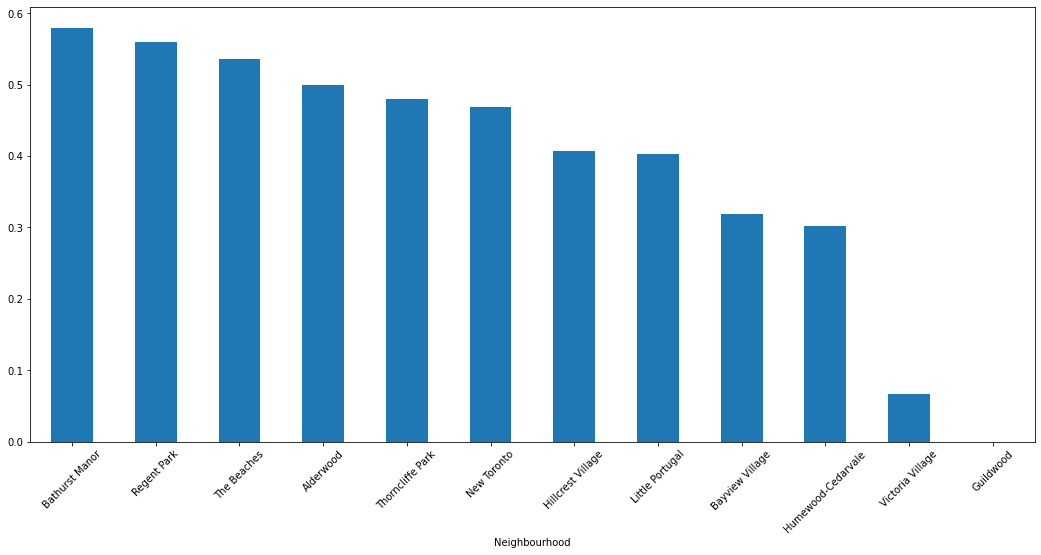

In [84]:
rental_rb = rental_merged[['Neighbourhood','Best Venues']]
rental_rb.rename(columns={'Best Venues': 'Frequency'}, inplace = True)
rental_rb.sort_values('Frequency', inplace = True, ascending = False)
rental_rb.plot.bar(x='Neighbourhood',y ='Frequency', rot = 45, figsize = (18, 8), legend = None)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylim(0,1)
plt.title('Percentage of Venues that are Best for a Rental Property', fontsize = 14)
plt.show()

### Foursquare Map Clustered Neighborhoods

Next, let's pull the coordinates for Toronto and build a map.

In [85]:
address = 'Toronto,Ontario'

geolocator = Nominatim(user_agent="Toronto,Ontario")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Finally, let's map our clustered neighborhoods to see which ones are more similar.

In [86]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(.7, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# # add markers to the map
markers_colors = []
for lat, lon, poi, cluster, bars in zip(rental_merged['Latitude'], rental_merged['Longitude'], rental_merged['Neighbourhood'], rental_merged['Cluster Labels'], rental_merged['Best Venues']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=35*bars,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## 3. Results and Discussion

We have pulled data on crime rates to filter out neighborhoods in Toronto that are deemed as "unsafe" and leveraged this data with information regarding popular venues that determine the value of a neighbourhood’s rental property value. Our analysis has informed us that:
- Coffee shop, Cafes, Bakeries, Restaurants, and Parks are the most common venues in low crime neighborhoods.
- The neighbourhood Guildwood has a transit station, but there are not many amenities nearby, therefore it should not be considered a good candidate to purchase a rental property.
- When Grocery Stores, Supermarkets, Restaurants, Bars, Cafes, and Coffee Shops are used to determine the “best” neighbourhood to buy a rental property, Bathurst Manor comes out on top.

The top 3 neighbourhoods in Toronto to buy a valuable property are:
1. Bathurst Manor
2. Regent Park
3. The Beaches

After these three neighbourhoods, there is a downward step change in the number of amenities available. Amenities are what attract tenants, and amenities are what ensure that you will continue to have tenants looking for rentals in that specific neighbourhood.

It is important to note that this project could have been a more in-depth analysis but was limited due to being based on Foursquare’ s data for popular venues. There are plenty other ways to assess the value of neighborhoods and venue popularity/crime rate is only one of them. 

It will be more helpful to look at average income for each neighbourhood and the ratings for the “best venues” in each neighbourhood.


## 4. Conclusion

We made it! We went from learning importing python libraries to figuring out the top three neighbourhoods to purchase a rental property in Toronto. The experience of learning Data Science fundamentals in this course was extremely fun and the journey has taught me so much. The tools that can be developed with Data Science have applications in every industry; I plan on using them in the Oil and Gas industry. Curiosity is king when it comes to applying Data Science and formulating an idea to dive into is the steppingstone. 

I wish everyone all the best and happy learning!